<a href="https://colab.research.google.com/github/Grandmaster12/DS4SG-Project-Sean/blob/main/Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Codebook: Twitter Depression Dataset

In [63]:
#importing libraries 
import numpy as np 
import matplotlib as plt 
import pandas as pd 
import seaborn as sns

In [53]:
#importing the data
url = 'https://raw.githubusercontent.com/zeineb-ouerghi/DS4SG-Project-/main/Data/Mental-Health-Twitter.csv'
raw = pd.read_csv(url)

# drop the original column for index since df has index now
raw.drop("Unnamed: 0", axis=1, inplace=True)
# drop post_id column since we won't need it for our analysis
raw.drop('post_id', axis=1, inplace=True)

# rearrange variable order
post_created = raw['post_created']
raw = raw.drop(columns=['post_created'])
raw.insert(loc=1, column='post_created', value=post_created)
raw.head()

,post_text,post_created,user_id,followers,friends,favourites,statuses,retweets,label
0,It's just over 2 years since I was diagnosed w...,Sun Aug 30 07:48:37 +0000 2015,1013187241,84,211,251,837,0,1
1,"It's Sunday, I need a break, so I'm planning t...",Sun Aug 30 07:31:33 +0000 2015,1013187241,84,211,251,837,1,1
2,Awake but tired. I need to sleep but my brain ...,Sat Aug 29 22:11:07 +0000 2015,1013187241,84,211,251,837,0,1
3,RT @SewHQ: #Retro bears make perfect gifts and...,Sat Aug 29 18:40:49 +0000 2015,1013187241,84,211,251,837,2,1
4,It’s hard to say whether packing lists are mak...,Sat Aug 29 18:40:26 +0000 2015,1013187241,84,211,251,837,1,1


## Variable information:

In [54]:
# checking the number of rows and variables
raw.shape

(20000, 9)

**post_text** : the post contents, stored as a string, gathered from the original tweets.  
**post_created** : the date and time when the tweet was posted, stored as a string (we will convert the entire column to be in datetime format), taken from the tweets.   
**user_id** : the ID of the user, stored as an integer, taken from the tweet information.  
**followers**: the number of followers of the user, stored as an integer, taken from their profile.  
**friends**: the number of the friends of the user, also stored as an integer, taken from their profiles.   
**favourites**: the number of "likes" the post has, stored as an integer, taken from the tweet itself.  
**statuses**: the number of total tweets they have, stored as an integer, taken from the users' profiles.  
**retweets**: the number of retweets the post had, stored as an integer, also taken from the tweet data itself. 
**label**: whether the user has depression or not, stored as '0' or '1', where 0 is not depressed and 1 is depressed.  

The number of null values will be explored in the next code cell. We have no null values in this dataset.

In [55]:
# checking the proportion of null-values in each column
percent_null = [(i, raw[i].isnull().mean()) for i in raw]
percents = pd.DataFrame(percent_null, columns=("Column", "% null values"))
display(percents)

,Column,% null values
0,post_text,0.0
1,post_created,0.0
2,user_id,0.0
3,followers,0.0
4,friends,0.0
5,favourites,0.0
6,statuses,0.0
7,retweets,0.0
8,label,0.0


In [56]:
# data information
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   post_text     20000 non-null  object
 1   post_created  20000 non-null  object
 2   user_id       20000 non-null  int64 
 3   followers     20000 non-null  int64 
 4   friends       20000 non-null  int64 
 5   favourites    20000 non-null  int64 
 6   statuses      20000 non-null  int64 
 7   retweets      20000 non-null  int64 
 8   label         20000 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 1.4+ MB


All variables except post_created and post_text are in integer format. In the following code cell, we will convert the post_created variable to datatime format and only keep the date (excluding timestamp).

In [57]:
raw['post_created'] = pd.to_datetime(raw['post_created']).dt.strftime('%m/%d/%Y')

In [59]:
#Description of the data 
raw.describe().T

,count,mean,std,min,25%,50%,75%,max
user_id,20000.0,3.548623e+16,1.606083e+17,14724376.0,324294391.0,1.052122e+09,2.285923e+09,7.631825e+17
followers,20000.0,9.004840e+02,1.899914e+03,0.0,177.0,4.760000e+02,1.197000e+03,2.861400e+04
friends,20000.0,7.824288e+02,1.834818e+03,0.0,211.0,5.610000e+02,7.010000e+02,2.851400e+04
favourites,20000.0,6.398236e+03,8.393073e+03,0.0,243.0,2.752000e+03,8.229000e+03,3.900800e+04
statuses,20000.0,4.439442e+04,1.407785e+05,3.0,5129.0,1.325100e+04,5.289200e+04,1.063601e+06
retweets,20000.0,1.437927e+03,1.511967e+04,0.0,0.0,0.000000e+00,1.000000e+00,8.395400e+05
label,20000.0,5.000000e-01,5.000125e-01,0.0,0.0,5.000000e-01,1.000000e+00,1.000000e+00


In [61]:
# correlation
raw.corr()

,user_id,followers,friends,favourites,statuses,retweets,label
user_id,1.000000,0.098022,-0.073787,-0.050215,-0.050672,-0.020921,-0.220954
followers,0.098022,1.000000,0.891919,-0.016242,-0.000215,0.001500,-0.011181
friends,-0.073787,0.891919,1.000000,-0.081756,-0.045420,0.009946,0.119818
favourites,-0.050215,-0.016242,-0.081756,1.000000,-0.053930,0.069551,-0.252289
statuses,-0.050672,-0.000215,-0.045420,-0.053930,1.000000,-0.005193,-0.246473
retweets,-0.020921,0.001500,0.009946,0.069551,-0.005193,1.000000,-0.025198
label,-0.220954,-0.011181,0.119818,-0.252289,-0.246473,-0.025198,1.000000


## The classes in our dataset are balanced

<AxesSubplot:xlabel='label', ylabel='count'>

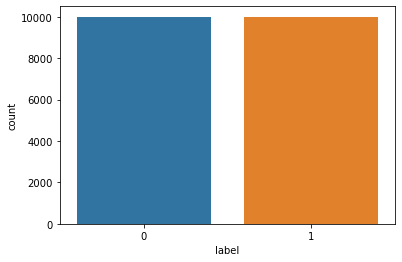

In [64]:
sns.countplot(data=raw,x="label")